Part 2 of this project aimed to look at the pills data up close, particularly into the dosage forms, colours, shapes and inactive excipients used in the dataset. Plotly was used as the main data visualisation library here, with the last part generating a small dataframe in preparation for a trial of data visualisation in Rust-Evcxr in part 3.

#### **Import dataframe library and pills dataset**

In [1]:
import polars as pl
import plotly.express as px

The pills.csv file saved from part 1 was imported as shown below.

In [2]:
df = pl.read_csv("pills.csv")
df

shape: (83925, 5)
┌───────────────┬────────────────────┬────────────────────┬────────────────────┬───────────────────┐
│ splshape_text ┆ splcolor_text      ┆ spl_strength       ┆ spl_inactive_ing   ┆ DosageForm        │
│ ---           ┆ ---                ┆ ---                ┆ ---                ┆ ---               │
│ str           ┆ str                ┆ str                ┆ str                ┆ str               │
╞═══════════════╪════════════════════╪════════════════════╪════════════════════╪═══════════════════╡
│ CAPSULE       ┆ PINK               ┆ TEMAZEPAM 15 mg;   ┆ SILICON            ┆ CAPSULE           │
│               ┆                    ┆                    ┆ DIOXIDE;EDETATE    ┆                   │
│               ┆                    ┆                    ┆ DISODIUM...        ┆                   │
│ ROUND         ┆ ORANGE             ┆ IBUPROFEN 200 mg;  ┆ SILICON            ┆ TABLET, FILM      │
│               ┆                    ┆                    ┆ DIOXIDE;STARCH,    ┆ COATED            │
│               ┆                    ┆                    ┆ CORN;CRO...        ┆                   │
│ PENTAGON (5   ┆ GREEN              ┆ DEXAMETHASONE 6    ┆ ANHYDROUS          ┆ TABLET            │
│ SIDED)        ┆                    ┆ mg;                ┆ LACTOSE;CELLULOSE, ┆                   │
│               ┆                    ┆                    ┆ MIC...             ┆                   │
│ ROUND         ┆ WHITE              ┆ Nickel Sulfate 1   ┆ null               ┆ TABLET            │
│               ┆                    ┆ [hp_X];Potassiu... ┆                    ┆                   │
│ ...           ┆ ...                ┆ ...                ┆ ...                ┆ ...               │
│ ROUND         ┆ PINK;ORANGE;YELLOW ┆ CALCIUM CARBONATE  ┆ CITRIC ACID MONOHY ┆ TABLET, CHEWABLE  │
│               ┆                    ┆ 750 mg;            ┆ DRATE;DEXTROSE...  ┆                   │
│ OVAL          ┆ GREEN              ┆ ACETAMINOPHEN 325  ┆ STARCH, CORN;D&C   ┆ TABLET, FILM      │
│               ┆                    ┆ mg;DEXTROMETHO...  ┆ YELLOW NO. 10 A... ┆ COATED            │
│ CAPSULE       ┆ BLUE               ┆ Amlodipine         ┆ Cellulose, microcr ┆ CAPSULE           │
│               ┆                    ┆ besylate 10        ┆ ystalline;Talc...  ┆                   │
│               ┆                    ┆ mg;Benaze...       ┆                    ┆                   │
│ ROUND         ┆ ORANGE             ┆ DARIFENACIN 15 mg; ┆ ANHYDROUS DIBASIC  ┆ TABLET, EXTENDED  │
│               ┆                    ┆                    ┆ CALCIUM PHOSPH...  ┆ RELEASE           │
└───────────────┴────────────────────┴────────────────────┴────────────────────┴───────────────────┘

#### **Change column names**

Again, column names were changed to something easier to understand.

In [3]:
# Rename all column names
df_new = df.rename({"splcolor_text": "Colour", 
                    "splshape_text": "Shape", 
                    "spl_strength": "Drug_strength", 
                    "spl_inactive_ing": "Inactive_excipients", 
                    "DosageForm": "Dosage_form"}
                  )
df_new

shape: (83925, 5)
┌─────────────┬─────────────────────┬────────────────────┬────────────────────┬────────────────────┐
│ Shape       ┆ Colour              ┆ Drug_strength      ┆ Inactive_excipient ┆ Dosage_form        │
│ ---         ┆ ---                 ┆ ---                ┆ s                  ┆ ---                │
│ str         ┆ str                 ┆ str                ┆ ---                ┆ str                │
│             ┆                     ┆                    ┆ str                ┆                    │
╞═════════════╪═════════════════════╪════════════════════╪════════════════════╪════════════════════╡
│ CAPSULE     ┆ PINK                ┆ TEMAZEPAM 15 mg;   ┆ SILICON            ┆ CAPSULE            │
│             ┆                     ┆                    ┆ DIOXIDE;EDETATE    ┆                    │
│             ┆                     ┆                    ┆ DISODIUM...        ┆                    │
│ ROUND       ┆ ORANGE              ┆ IBUPROFEN 200 mg;  ┆ SILICON            ┆ TABLET, FILM       │
│             ┆                     ┆                    ┆ DIOXIDE;STARCH,    ┆ COATED             │
│             ┆                     ┆                    ┆ CORN;CRO...        ┆                    │
│ PENTAGON (5 ┆ GREEN               ┆ DEXAMETHASONE 6    ┆ ANHYDROUS          ┆ TABLET             │
│ SIDED)      ┆                     ┆ mg;                ┆ LACTOSE;CELLULOSE, ┆                    │
│             ┆                     ┆                    ┆ MIC...             ┆                    │
│ ROUND       ┆ WHITE               ┆ Nickel Sulfate 1   ┆ null               ┆ TABLET             │
│             ┆                     ┆ [hp_X];Potassiu... ┆                    ┆                    │
│ ...         ┆ ...                 ┆ ...                ┆ ...                ┆ ...                │
│ ROUND       ┆ PINK;ORANGE;YELLOW  ┆ CALCIUM CARBONATE  ┆ CITRIC ACID MONOHY ┆ TABLET, CHEWABLE   │
│             ┆                     ┆ 750 mg;            ┆ DRATE;DEXTROSE...  ┆                    │
│ OVAL        ┆ GREEN               ┆ ACETAMINOPHEN 325  ┆ STARCH, CORN;D&C   ┆ TABLET, FILM       │
│             ┆                     ┆ mg;DEXTROMETHO...  ┆ YELLOW NO. 10 A... ┆ COATED             │
│ CAPSULE     ┆ BLUE                ┆ Amlodipine         ┆ Cellulose, microcr ┆ CAPSULE            │
│             ┆                     ┆ besylate 10        ┆ ystalline;Talc...  ┆                    │
│             ┆                     ┆ mg;Benaze...       ┆                    ┆                    │
│ ROUND       ┆ ORANGE              ┆ DARIFENACIN 15 mg; ┆ ANHYDROUS DIBASIC  ┆ TABLET, EXTENDED   │
│             ┆                     ┆                    ┆ CALCIUM PHOSPH...  ┆ RELEASE            │
└─────────────┴─────────────────────┴────────────────────┴────────────────────┴────────────────────┘

#### **Visualising oral dosage forms & colours in pills**

Grabbing only unique drugs in the dataset to minimise duplications.

In [4]:
# for colour, dosage form & drug strengths scatter plot
df_viz_2 = df_new.unique(subset = "Drug_strength")
df_viz_2

shape: (9287, 5)
┌────────────────────┬──────────────┬────────────────────┬────────────────────┬────────────────────┐
│ Shape              ┆ Colour       ┆ Drug_strength      ┆ Inactive_excipient ┆ Dosage_form        │
│ ---                ┆ ---          ┆ ---                ┆ s                  ┆ ---                │
│ str                ┆ str          ┆ str                ┆ ---                ┆ str                │
│                    ┆              ┆                    ┆ str                ┆                    │
╞════════════════════╪══════════════╪════════════════════╪════════════════════╪════════════════════╡
│ CAPSULE            ┆ PINK         ┆ TEMAZEPAM 15 mg;   ┆ SILICON            ┆ CAPSULE            │
│                    ┆              ┆                    ┆ DIOXIDE;EDETATE    ┆                    │
│                    ┆              ┆                    ┆ DISODIUM...        ┆                    │
│ ROUND              ┆ ORANGE       ┆ IBUPROFEN 200 mg;  ┆ SILICON            ┆ TABLET, FILM       │
│                    ┆              ┆                    ┆ DIOXIDE;STARCH,    ┆ COATED             │
│                    ┆              ┆                    ┆ CORN;CRO...        ┆                    │
│ PENTAGON (5 SIDED) ┆ GREEN        ┆ DEXAMETHASONE 6    ┆ ANHYDROUS          ┆ TABLET             │
│                    ┆              ┆ mg;                ┆ LACTOSE;CELLULOSE, ┆                    │
│                    ┆              ┆                    ┆ MIC...             ┆                    │
│ ROUND              ┆ WHITE        ┆ Nickel Sulfate 1   ┆ null               ┆ TABLET             │
│                    ┆              ┆ [hp_X];Potassiu... ┆                    ┆                    │
│ ...                ┆ ...          ┆ ...                ┆ ...                ┆ ...                │
│ CAPSULE            ┆ PURPLE       ┆ CALCIUM CITRATE    ┆ GELATIN;           ┆ CAPSULE, GELATIN   │
│                    ┆              ┆ 104 mg;IRON 27     ┆                    ┆ COATED             │
│                    ┆              ┆ m...               ┆                    ┆                    │
│ CAPSULE            ┆ GREEN;YELLOW ┆ LENALIDOMIDE 10    ┆ ANHYDROUS LACTOSE; ┆ CAPSULE            │
│                    ┆              ┆ mg;                ┆ MICROCRYSTALLI...  ┆                    │
│ OVAL               ┆ WHITE        ┆ folic acid 1       ┆ cellulose, microcr ┆ TABLET             │
│                    ┆              ┆ mg;.BETA.-CAROTENE ┆ ystalline;pota...  ┆                    │
│                    ┆              ┆ ...                ┆                    ┆                    │
│ CAPSULE            ┆ BLUE         ┆ Amlodipine         ┆ Cellulose, microcr ┆ CAPSULE            │
│                    ┆              ┆ besylate 10        ┆ ystalline;Talc...  ┆                    │
│                    ┆              ┆ mg;Benaze...       ┆                    ┆                    │
└────────────────────┴──────────────┴────────────────────┴────────────────────┴────────────────────┘

One way to avoid switching Polars dataframe to a Pandas one, which might be one of the options to plot data from Polars dataframes in Plotly, was to call the x-axis and y-axis datasets directly as shown in the codes below.

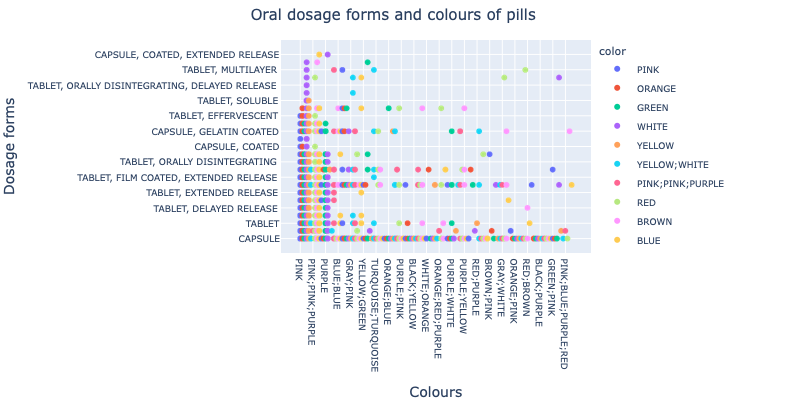

In [5]:
# scatter plot for colour, dosage form & drug strengths for all unique drugs in this dataset
fig = px.scatter(x = df_viz_2["Colour"], 
                 y = df_viz_2["Dosage_form"], 
                 color = df_viz_2["Colour"],
                 hover_name = df_viz_2["Drug_strength"],
                 width = 900, 
                 height = 400,
                 title = "Oral dosage forms and colours of pills")

fig.update_layout(
    title = dict(
        font = dict(
            size = 15)),
    title_x = 0.5,
    margin = dict(
        l = 20, r = 20, t = 40, b = 3),
    xaxis = dict(
        tickfont = dict(size = 9), 
        title = "Colours"
    ),
    yaxis = dict(
        tickfont = dict(size = 9), 
        title = "Dosage forms"
    ),
    legend = dict(
        font = dict(
            size = 9)))

fig.show()

White was the most common colour, especially after zooming in the plot. Capsule was very commonly used as the oral dosage form of choice in this dataset.

#### **Visualising shapes & colours in pills**

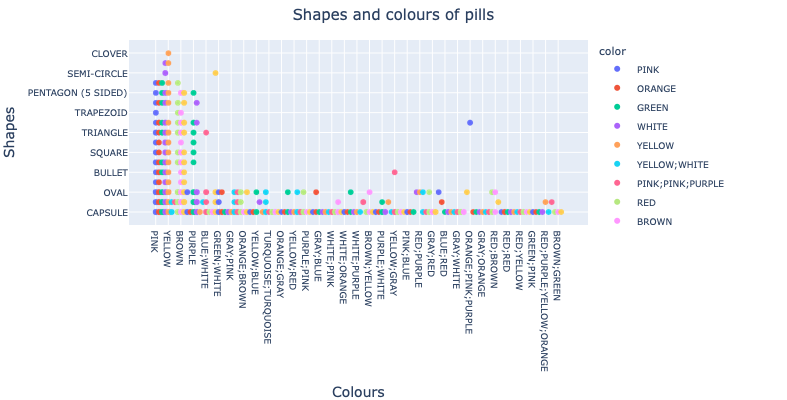

In [6]:
# Scatter plot between shape and colour

fig = px.scatter(x = df_viz_2["Colour"], 
                 y = df_viz_2["Shape"], 
                 color = df_viz_2["Colour"],
                 hover_name = df_viz_2["Drug_strength"],
                 width = 900, 
                 height = 400,
                 title = "Shapes and colours of pills")

fig.update_layout(
    title = dict(
        font = dict(
            size = 15)),
    title_x = 0.5,
    margin = dict(
        l = 20, r = 20, t = 40, b = 3),
    xaxis = dict(
        tickfont = dict(size = 9), 
        title = "Colours"
    ),
    yaxis = dict(
        tickfont = dict(size = 9), 
        title = "Shapes"
    ),
    legend = dict(
        font = dict(
            size = 9)))

fig.show()

Capsule was again the most common oral dosage shape used for pills in the dataset. Common colours included red, brown, blue, purple, pink, orange, green, white and yellow. Combination colours followed these common ones, which had a mixture of a variety of colours used simultaneously, likely to avoid confusions and errors in dispensings or administrations.

#### **Visualising inactive excipients in pills**

The messiest part of the data actually lied in the column of "Inactive_excipients", with numerous different punctuations used inconsistently, such as forward slashes, commas and semi-colons. There were vast quantities of different inactive components used for oral dosage forms. Because of this, I had to spend a bit more time cleaning up the texts in order to observe what sort of visulaisations would result in the end.

In [59]:
# Formulated a separate dataframe with just "Inactive_excipients"
df_ie = df_new.select([pl.col("Inactive_excipients")])
df_ie

shape: (83925, 1)
┌─────────────────────────────────────┐
│ Inactive_excipients                 │
│ ---                                 │
│ str                                 │
╞═════════════════════════════════════╡
│ SILICON DIOXIDE;EDETATE DISODIUM... │
│ SILICON DIOXIDE;STARCH, CORN;CRO... │
│ ANHYDROUS LACTOSE;CELLULOSE, MIC... │
│ null                                │
│ ...                                 │
│ CITRIC ACID MONOHYDRATE;DEXTROSE... │
│ STARCH, CORN;D&C YELLOW NO. 10 A... │
│ Cellulose, microcrystalline;Talc... │
│ ANHYDROUS DIBASIC CALCIUM PHOSPH... │
└─────────────────────────────────────┘

##### **Text cleaning for inactive excipients column**

In order to prepare this column for data visualisations, I used Polars' string expressions to try and tidy up the raw texts.

In [29]:
# Clean string texts

df_de = (df_ie.with_column(pl.col("Inactive_excipients").str.to_lowercase(
    ).str.replace_all(
        ";", ", "
    ).str.replace_all(
        " /", ", "
    ).str.replace_all(
        "/", ", "
    ).str.strip(
        " ,"
    ).str.split(
        by = ", "
    ).alias(
        "Inactive"
    )
).explode(
    "Inactive"
)
)

df_de

shape: (840029, 2)
┌─────────────────────────────────────┬─────────────────────┐
│ Inactive_excipients                 ┆ Inactive            │
│ ---                                 ┆ ---                 │
│ str                                 ┆ str                 │
╞═════════════════════════════════════╪═════════════════════╡
│ SILICON DIOXIDE;EDETATE DISODIUM... ┆ silicon dioxide     │
│ SILICON DIOXIDE;EDETATE DISODIUM... ┆ edetate disodium    │
│ SILICON DIOXIDE;EDETATE DISODIUM... ┆ lactose monohydrate │
│ SILICON DIOXIDE;EDETATE DISODIUM... ┆ magnesium stearate  │
│ ...                                 ┆ ...                 │
│ ANHYDROUS DIBASIC CALCIUM PHOSPH... ┆ magnesium stearate  │
│ ANHYDROUS DIBASIC CALCIUM PHOSPH... ┆ titanium dioxide    │
│ ANHYDROUS DIBASIC CALCIUM PHOSPH... ┆ talc                │
│ ANHYDROUS DIBASIC CALCIUM PHOSPH... ┆ ferric oxide yellow │
└─────────────────────────────────────┴─────────────────────┘

In [30]:
# Quick look at the dataframe to see before and after text cleaning
print(df_de.glimpse())

Rows: 840029
Columns: 2
$ Inactive_excipients <Utf8> SILICON DIOXIDE;EDETATE DISODIUM;LACTOSE MONOHYDRATE;MAGNESIUM STEARATE;CELLULOSE, MICROCRYSTALLINE;STARCH, CORN;SODIUM LAURYL SULFATE;FD&C BLUE NO. 1;FD&C RED NO. 40;GELATIN;TITANIUM DIOXIDE;BUTYL ALCOHOL;, SILICON DIOXIDE;EDETATE DISODIUM;LACTOSE MONOHYDRATE;MAGNESIUM STEARATE;CELLULOSE, MICROCRYSTALLINE;STARCH, CORN;SODIUM LAURYL SULFATE;FD&C BLUE NO. 1;FD&C RED NO. 40;GELATIN;TITANIUM DIOXIDE;BUTYL ALCOHOL;, SILICON DIOXIDE;EDETATE DISODIUM;LACTOSE MONOHYDRATE;MAGNESIUM STEARATE;CELLULOSE, MICROCRYSTALLINE;STARCH, CORN;SODIUM LAURYL SULFATE;FD&C BLUE NO. 1;FD&C RED NO. 40;GELATIN;TITANIUM DIOXIDE;BUTYL ALCOHOL;, SILICON DIOXIDE;EDETATE DISODIUM;LACTOSE MONOHYDRATE;MAGNESIUM STEARATE;CELLULOSE, MICROCRYSTALLINE;STARCH, CORN;SODIUM LAURYL SULFATE;FD&C BLUE NO. 1;FD&C RED NO. 40;GELATIN;TITANIUM DIOXIDE;BUTYL ALCOHOL;, SILICON DIOXIDE;EDETATE DISODIUM;LACTOSE MONOHYDRATE;MAGNESIUM STEARATE;CELLULOSE, MICROCRYSTALLINE;STARCH, CORN;SO

As shown above, the "Inactive_excipients" column was the original column for excipients, where the second column named, "Inactive" was the new column shown after the first string strip and row text explosion. The excipients were broken down into smaller units than previously.

In [42]:
# Re-organise the dataframe to choose the cleaned "Inactive" column
df_final = df_de.select(["Inactive"])
df_final

shape: (840029, 1)
┌─────────────────────┐
│ Inactive            │
│ ---                 │
│ str                 │
╞═════════════════════╡
│ silicon dioxide     │
│ edetate disodium    │
│ lactose monohydrate │
│ magnesium stearate  │
│ ...                 │
│ magnesium stearate  │
│ titanium dioxide    │
│ talc                │
│ ferric oxide yellow │
└─────────────────────┘

In [43]:
# Remove all cells with null values
df_final = df_final.drop_nulls()

In [60]:
# Group the data by different inactive excipients with counts shown
df_final = df_final.groupby("Inactive").agg(pl.count())
# Provide a summary statistics of this df_bar dataframe
df_final.describe()

shape: (7, 3)
┌────────────┬──────────────────────────┬─────────────┐
│ describe   ┆ Inactive                 ┆ count       │
│ ---        ┆ ---                      ┆ ---         │
│ str        ┆ str                      ┆ f64         │
╞════════════╪══════════════════════════╪═════════════╡
│ count      ┆ 1666                     ┆ 1666.0      │
│ null_count ┆ 0                        ┆ 0.0         │
│ mean       ┆ null                     ┆ 502.097239  │
│ std        ┆ null                     ┆ 3102.971142 │
│ min        ┆  100-200 mpa.s at 1%)    ┆ 1.0         │
│ max        ┆ zinc sulfate monohydrate ┆ 58910.0     │
│ median     ┆ null                     ┆ 4.0         │
└────────────┴──────────────────────────┴─────────────┘

In [61]:
df_final.head()

shape: (5, 2)
┌──────────────────────────────┬───────┐
│ Inactive                     ┆ count │
│ ---                          ┆ ---   │
│ str                          ┆ u32   │
╞══════════════════════════════╪═══════╡
│ microcrystalline cellulose   ┆ 16474 │
│ methylcellulose (15 cps)     ┆ 112   │
│ polyvinyl alcohol (40000 mw) ┆ 2     │
│ povidone                     ┆ 13594 │
│ dextrates                    ┆ 244   │
└──────────────────────────────┴───────┘

##### **Inactive excipient counts**

In [62]:
df_final = df_final.with_column((pl.col("count")).cast(pl.Int64, strict = False))
df_final

shape: (1666, 2)
┌────────────────────────────────┬───────┐
│ Inactive                       ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ i64   │
╞════════════════════════════════╪═══════╡
│ microcrystalline cellulose     ┆ 16474 │
│ methylcellulose (15 cps)       ┆ 112   │
│ polyvinyl alcohol (40000 mw)   ┆ 2     │
│ povidone                       ┆ 13594 │
│ ...                            ┆ ...   │
│ ethylcellulose (100 cps)       ┆ 4     │
│ succinic acid                  ┆ 155   │
│ angelica gigas root            ┆ 7     │
│ carboxymethylcellulose calcium ┆ 439   │
└────────────────────────────────┴───────┘

##### **Overview of inactive excipients used in oral dosage forms**

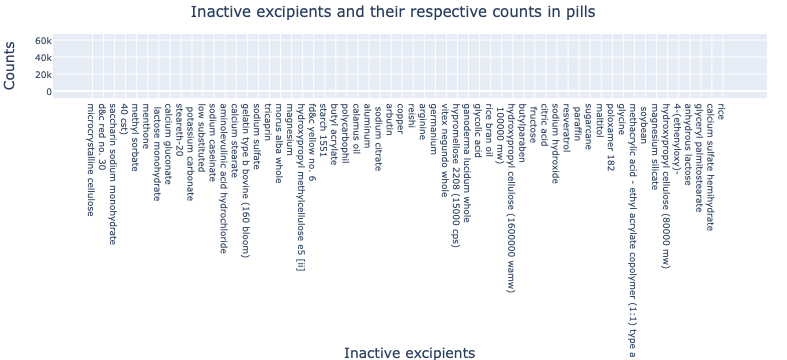

In [66]:
fig = px.scatter(x = df_final["Inactive"], 
                 y = df_final["count"], 
                 hover_name = df_final["Inactive"],
                 title = "Inactive excipients and their respective counts in pills")

fig.update_layout(
    title = dict(
        font = dict(
            size = 15)),
    title_x = 0.5,
    margin = dict(
        l = 20, r = 20, t = 40, b = 10),
    xaxis = dict(
        tickfont = dict(size = 9), 
        title = "Inactive excipients"
    ),
    yaxis = dict(
        tickfont = dict(size = 9), 
        title = "Counts"
    ),
    legend = dict(
        font = dict(
            size = 9)))


fig.show()

##### **Frequently used inactive excipients**

In [67]:
df_ex = df_final.sort("count", reverse = True).filter((pl.col("count")) >= 10000)
df_ex.head()

shape: (5, 2)
┌────────────────────┬───────┐
│ Inactive           ┆ count │
│ ---                ┆ ---   │
│ str                ┆ i64   │
╞════════════════════╪═══════╡
│ magnesium stearate ┆ 58910 │
│ titanium dioxide   ┆ 43249 │
│ unspecified        ┆ 35744 │
│ silicon dioxide    ┆ 34080 │
│ starch             ┆ 32501 │
└────────────────────┴───────┘

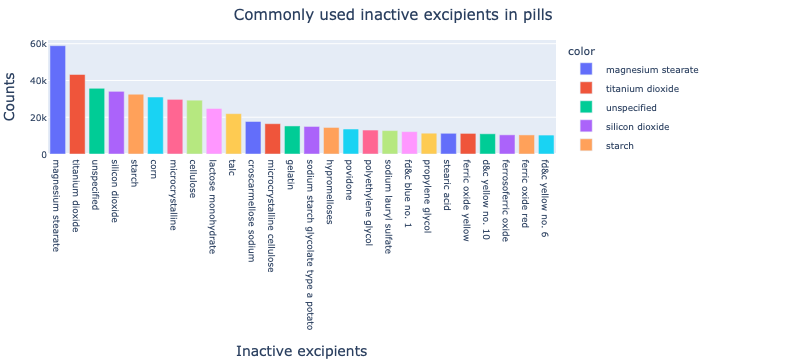

In [69]:
fig = px.bar(x = df_ex["Inactive"], 
             y = df_ex["count"], 
             color = df_ex["Inactive"],
             title = "Commonly used inactive excipients in pills")

fig.update_layout(
    title = dict(
        font = dict(
            size = 15)),
    title_x = 0.5,
    margin = dict(
        l = 10, r = 10, t = 40, b = 5),
    xaxis = dict(
        tickfont = dict(size = 9), 
        title = "Inactive excipients"
    ),
    yaxis = dict(
        tickfont = dict(size = 9), 
        title = "Counts"
    ),
    legend = dict(
        font = dict(
            size = 9)))

fig.show()

#### **Create a small dataframe for data visualisation in Rust-Evcxr**

Filter out acetaminophen in the "Drug_strength" column and remove all duplicates in the dataset.

In [75]:
# Find all drugs that started with certain letters
df_ac = df_new.filter(
    pl.col("Drug_strength")
    .str.starts_with("acetam")).unique(subset = ["Drug_strength"])

df_ac

shape: (13, 5)
┌─────────┬──────────────┬────────────────────────┬────────────────────────┬───────────────────────┐
│ Shape   ┆ Colour       ┆ Drug_strength          ┆ Inactive_excipients    ┆ Dosage_form           │
│ ---     ┆ ---          ┆ ---                    ┆ ---                    ┆ ---                   │
│ str     ┆ str          ┆ str                    ┆ str                    ┆ str                   │
╞═════════╪══════════════╪════════════════════════╪════════════════════════╪═══════════════════════╡
│ CAPSULE ┆ RED          ┆ acetaminophen 500 mg / ┆ starch, corn /         ┆ CAPSULE               │
│         ┆              ┆ oxycodone...           ┆ Docusate sodium /...   ┆                       │
│ OVAL    ┆ WHITE        ┆ acetaminophen 325      ┆ anhydrous citric       ┆ TABLET, FILM COATED   │
│         ┆              ┆ mg;dextrometho...      ┆ acid;carnauba w...     ┆                       │
│ ROUND   ┆ WHITE        ┆ acetaminophen 300      ┆ powdered               ┆ TABLET                │
│         ┆              ┆ mg;codeine pho...      ┆ cellulose;magnesium    ┆                       │
│         ┆              ┆                        ┆ ste...                 ┆                       │
│ ROUND   ┆ WHITE        ┆ acetaminophen 325 mg;  ┆ hydroxypropyl          ┆ TABLET                │
│         ┆              ┆                        ┆ cellulose, low sub...  ┆                       │
│ ...     ┆ ...          ┆ ...                    ┆ ...                    ┆ ...                   │
│ CAPSULE ┆ ORANGE;BROWN ┆ acetaminophen 162.5    ┆ CALCIUM PHOSPHATE,     ┆ CAPSULE               │
│         ┆              ┆ mg;chlorphen...        ┆ DIBASIC, ANHY...       ┆                       │
│ OVAL    ┆ WHITE        ┆ acetaminophen 650 mg;  ┆ carnauba               ┆ TABLET, FILM COATED,  │
│         ┆              ┆                        ┆ wax;HYDROXYETHYL       ┆ EXTENDED RE...        │
│         ┆              ┆                        ┆ CELLUL...              ┆                       │
│ ROUND   ┆ WHITE        ┆ acetaminophen 325      ┆ calcium stearate;crosc ┆ TABLET                │
│         ┆              ┆ mg;phenylephri...      ┆ armellose ...          ┆                       │
│ OVAL    ┆ BLUE         ┆ acetaminophen 500      ┆ carnauba               ┆ TABLET, FILM COATED   │
│         ┆              ┆ mg;diphenhydra...      ┆ wax;CROSPOVIDONE;FD&C  ┆                       │
│         ┆              ┆                        ┆ B...                   ┆                       │
└─────────┴──────────────┴────────────────────────┴────────────────────────┴───────────────────────┘

In [76]:
df_ac = df_ac.groupby("Colour").agg(pl.count())
df_ac

shape: (6, 2)
┌──────────────┬───────┐
│ Colour       ┆ count │
│ ---          ┆ ---   │
│ str          ┆ u32   │
╞══════════════╪═══════╡
│ ORANGE;BROWN ┆ 1     │
│ WHITE        ┆ 7     │
│ RED          ┆ 1     │
│ ORANGE       ┆ 1     │
│ BLUE         ┆ 2     │
│ YELLOW;WHITE ┆ 1     │
└──────────────┴───────┘

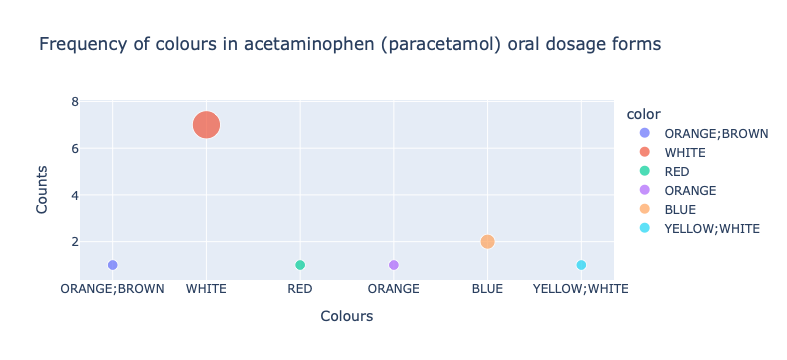

In [78]:
fig = px.scatter(x = df_ac["Colour"], 
                 y = df_ac["count"], 
                 size = df_ac["count"], 
                 color = df_ac["Colour"],
                 title = "Frequency of colours in acetaminophen (paracetamol) oral dosage forms"
                )

fig.update_layout(
    xaxis = dict(
        title = "Colours"
    ), 
    yaxis = dict(
        title = "Counts"
    )
)

fig.show()